In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-census-income/adult.csv


In [4]:
df = pd.read_csv("/kaggle/input/adult-census-income/adult.csv")

In [5]:
print(df.head(3))
print(df.shape)
print(df.describe())
print(df.info())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   

        occupation   relationship   race     sex  capital.gain  capital.loss  \
0                ?  Not-in-family  White  Female             0          4356   
1  Exec-managerial  Not-in-family  White  Female             0          4356   
2                ?      Unmarried  Black  Female             0          4356   

   hours.per.week native.country income  
0              40  United-States  <=50K  
1              18  United-States  <=50K  
2              40  United-States  <=50K  
(32561, 15)
                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679  

In [ ]:
print("Missing values:")
print((df == '?').sum())

In [6]:
df.replace('?', np.nan, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

In [7]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# PyTorch
import torch
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# Class balance
sns.countplot(data=df, x='income')
plt.title("Income Class Distribution")
plt.show()

# Example: Age vs Income
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='age', hue='income', bins=30, kde=True)
plt.title("Age Distribution by Income")
plt.show()

# Example: Education level count
plt.figure(figsize=(10, 4))
sns.countplot(data=df, y='education', order=df['education'].value_counts().index)
plt.title("Education Level Count")
plt.show()


In [8]:
categorical_cols = df.select_dtypes(include="object").columns

In [ ]:
print(categorical_cols)

In [9]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
for col, le in label_encoders.items():
    print("col name: ", col)
    print(le.classes_, "\n")
    

In [ ]:
for col in categorical_cols:
    if df[col].dtype == 'int64' and col != 'income':
        print(f"\n{col}:\n", df[col].value_counts())


In [ ]:
df['income'].value_counts(normalize=True)
 # 0 is less than 50k

In [ ]:
df.corr()["income"].sort_values(ascending = False) # only captures linear relationships

In [8]:
X = df.drop("income", axis=1)
y = df["income"]

In [9]:
from scipy.stats import ttest_ind

for col in ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']:
    group0 = df[df['income'] == 0][col]
    group1 = df[df['income'] == 1][col]
    t_stat, p_val = ttest_ind(group0, group1, equal_var=False)
    print(f"{col}: t = {t_stat:.2f}, p = {p_val:.4f}")


age: t = -49.50, p = 0.0000
education.num: t = -62.39, p = 0.0000
capital.gain: t = -22.80, p = 0.0000
capital.loss: t = -19.64, p = 0.0000
hours.per.week: t = -43.20, p = 0.0000


In [10]:
drop_cols = []

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X)  # chi2 requires non-negative features
chi2_scores, chi2_pvals = chi2(X_scaled, y)

print("\n=== Chi-Squared p-values ===")
for col, p in zip(X.columns, chi2_pvals):
    print(f"{col}: p-value = {p:.4e}")

In [11]:
drop_cols.extend(["fnlwgt","workclass","native.country"])

In [ ]:
print("\n=== Feature-to-feature correlation matrix ===")
feature_corr = X.corr()
print(feature_corr)

plt.figure(figsize=(12, 10))
sns.heatmap(feature_corr, annot=False, cmap='coolwarm')
plt.title("Feature-to-Feature Correlation Heatmap")
plt.show()

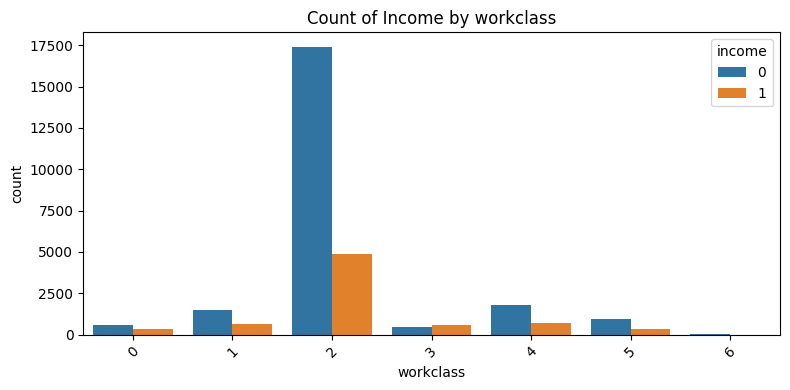

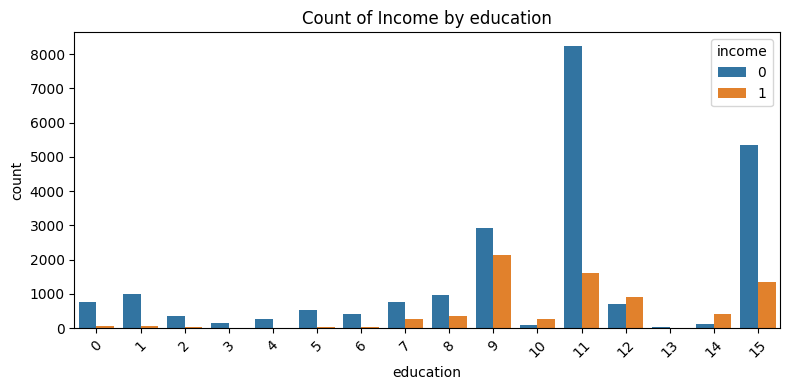

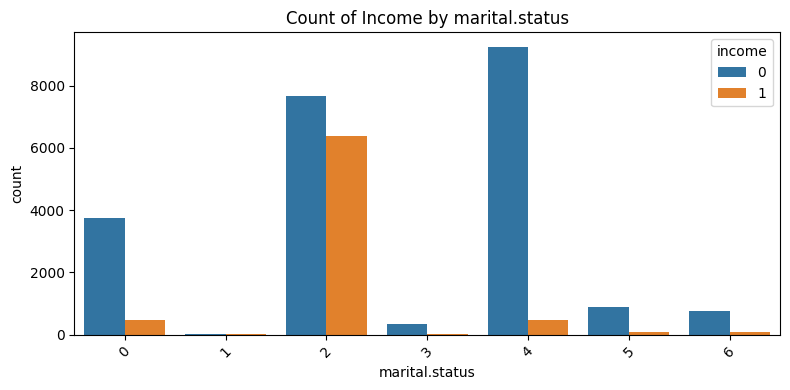

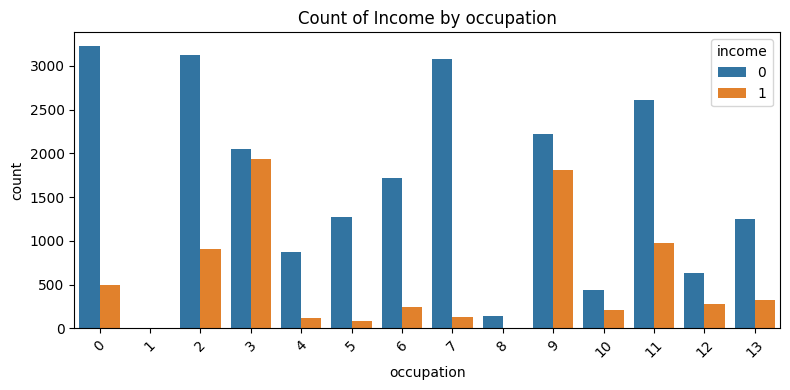

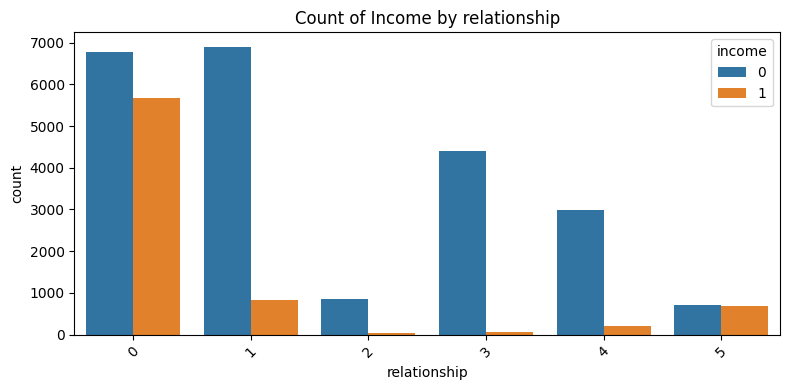

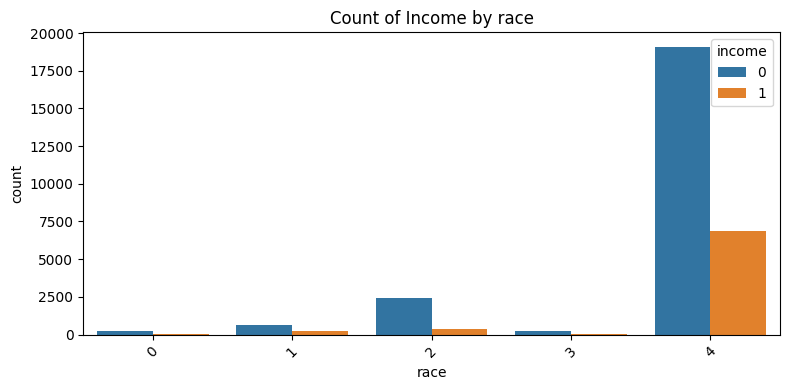

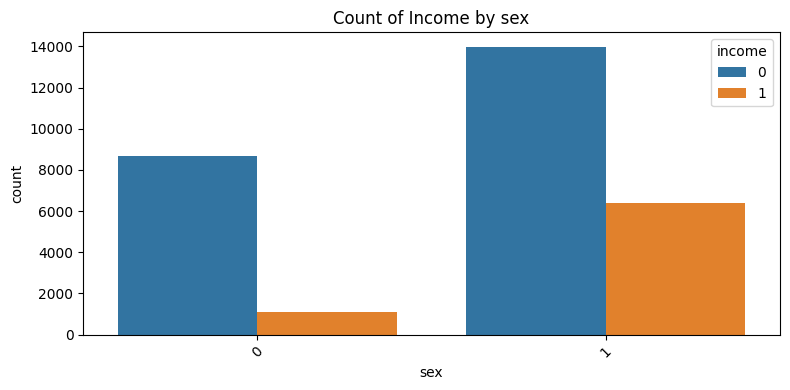

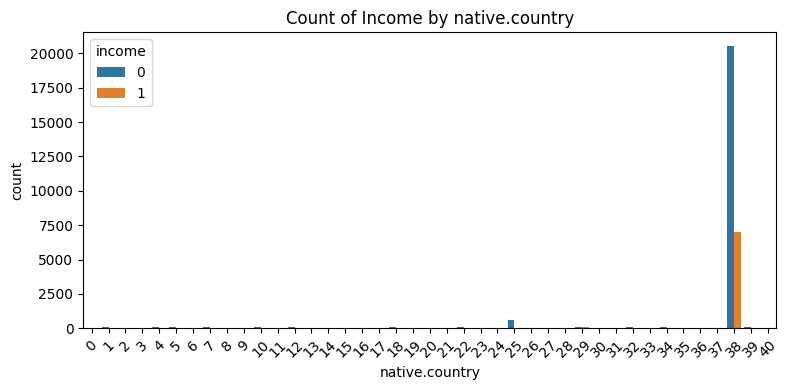

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols_wo_income = [
    'workclass', 'education', 'marital.status', 'occupation',
    'relationship', 'race', 'sex', 'native.country'
]

for col in categorical_cols_wo_income:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='income')
    plt.title(f"Count of Income by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
numerical_cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='income', y=col, data=df)
    plt.title(f"{col} by Income")
    plt.tight_layout()
    plt.show()


In [ ]:
sns.violinplot(x='income', y='age', data=df)


In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    for income_value in df['income'].unique():
        subset = df[df['income'] == income_value]
        sns.kdeplot(subset[col], label=f"Income = {income_value}", fill=True)
    plt.title(f"Distribution of {col} by Income")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [12]:
drop_cols.append("education")

In [ ]:
drop_cols

In [13]:
df.drop(columns=drop_cols, inplace=True)

In [14]:
df.columns = df.columns.str.replace('.', '_', regex=False).str.lower().str.strip()

In [15]:
print("Cleaned column names:")
print(df.columns.tolist())

Cleaned column names:
['age', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'income']


In [ ]:
df.head()

In [ ]:
label_encoders

In [16]:
for col in drop_cols:
    label_encoders.pop(col, None)

#  Update keys in label_encoders to match renamed columns
label_encoders = {
    col.replace('.', '_').lower().strip(): le
    for col, le in label_encoders.items()
}

#  Confirm updated keys match df.columns
print("Label encoders available for columns:")
print(label_encoders.keys())

Label encoders available for columns:
dict_keys(['marital_status', 'occupation', 'relationship', 'race', 'sex', 'income'])


In [ ]:
label_encoders

In [17]:
X = df.drop("income", axis=1)
y = df["income"]

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Now:
# 70% → train
# 15% → dev (hyperparam tuning)
# 15% → test (final evaluation)


In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.metrics import f1_score
import random

In [ ]:
class ANN1(nn.Module):
    def __init__(self, input_dim, hidden_units):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_units), # first hidden layer
            nn.BatchNorm1d(hidden_units), # do batch normalization on Z the preactivation
            nn.ReLU(), # relu activation function
            nn.Linear(hidden_units, 1), # next linear layer
            nn.Sigmoid() # sigmoid activation directly
        )

    def forward(self, x):
        return self.net(x).squeeze() # .squeeze() removes any singleton dimensions

In [20]:
def train_one_epoch(model, loader, optimizer, criterion):
    model.train()
    total_loss = 0
    for xb, yb in loader:
        optimizer.zero_grad() # clear prev mini batch gradients
        out = model(xb)
        loss = criterion(out, yb.float())
        loss.backward() # back prop
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    return total_loss / len(loader.dataset)

def evaluate(model, loader, criterion):
    model.eval()
    preds, targets = [], []
    total_loss = 0
    with torch.no_grad():
        for xb, yb in loader:
            out = model(xb)
            loss = criterion(out, yb.float())
            total_loss += loss.item() * xb.size(0)
            preds += (out > 0.5).long().tolist() # threshold 0.5
            targets += yb.tolist()
    f1 = f1_score(targets, preds) # use f1 score
    return total_loss / len(loader.dataset), f1


In [ ]:
eg_model = ANN1(input_dim=X_train.shape[1], hidden_units = 64)

In [ ]:
eg_model

In [ ]:
def run_trial(X_train, y_train, X_dev, y_dev, lr, mini_batch_size = 64, verbose=True):
    # Create datasets and loaders
    train_ds = TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                             torch.tensor(y_train, dtype=torch.long))
    dev_ds = TensorDataset(torch.tensor(X_dev, dtype=torch.float32),
                           torch.tensor(y_dev, dtype=torch.long))

    train_loader = DataLoader(train_ds, batch_size=mini_batch_size, shuffle=True)
    dev_loader = DataLoader(dev_ds, batch_size=256)

    # Model
    model = ANN1(input_dim=X_train.shape[1], hidden_units=64)
    
    # Optimizer with standard L2 regularization
    optimizer = torch.optim.Adam(
    model.parameters(),
    lr=lr,                   # learning rate
    betas=(0.9, 0.999),      # beta1 and beta2 (default values)
    eps=1e-8,                # epsilon for numerical stability
    weight_decay=1e-4,       # L2 regularization 
    amsgrad=False            # variant of Adam, keep False unless testing AMSGrad
)

    criterion = nn.BCELoss()

    for epoch in range(20):
        train_loss = train_one_epoch(model, train_loader, optimizer, criterion)
        f1 = evaluate(model, dev_loader, criterion)
        if verbose:
            print(f"[LR={lr:.1e}] Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Dev F1: {f1:.4f}")


- Learning rate is the most important parameter.
- beta1 = 0.9, beta2 = 0.999, epsilon = 10^-8 seldom need changing and are given directly by authors in the paper so we will not touch those at all.
- After learning rate, mini batch size, hidden units, and beta if using rms prop become imoprtant.
- Then hidden layers.

For learning rate it is very important that the sampling is not uniform on teh typical scale, but on the log scale.
Becomes more sensitive as it is close to 0 or 1.

# Please refer to version 1 for some of the trial runs. They did not get saved in Kaggle due to some error

In [ ]:
class ANN2(nn.Module):
    def __init__(self, input_dim, hidden1, hidden2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden1),
            nn.BatchNorm1d(hidden1),
            nn.ReLU(),
            nn.Linear(hidden1, hidden2),
            nn.BatchNorm1d(hidden2),
            nn.ReLU(),
            nn.Linear(hidden2, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x).squeeze()


In [ ]:
def run_trial4(X_train, y_train, X_dev, y_dev, lr, hidden1, hidden2, mini_batch_size=64, epochs=20, verbose=True):
    train_ds = TensorDataset(torch.tensor(X_train.values, dtype=torch.float32),
                             torch.tensor(y_train.values, dtype=torch.long))
    dev_ds = TensorDataset(torch.tensor(X_dev.values, dtype=torch.float32),
                           torch.tensor(y_dev.values, dtype=torch.long))
    
    train_loader = DataLoader(train_ds, batch_size=mini_batch_size, shuffle=True)
    dev_loader = DataLoader(dev_ds, batch_size=256)

    model = ANN2(input_dim=X_train.shape[1], hidden1=hidden1, hidden2=hidden2)

    optimizer = torch.optim.Adam(
        model.parameters(), lr=lr, betas=(0.9, 0.999),
        eps=1e-8, weight_decay=1e-4, amsgrad=False
    )

    criterion = nn.BCELoss()
    best_f1 = 0

    for epoch in range(epochs):
        train_loss = train_one_epoch(model, train_loader, optimizer, criterion)
        val_loss, f1 = evaluate(model, dev_loader, criterion)
        if f1 > best_f1:
            best_f1 = f1
        if verbose:
            print(f"[LR={lr:.1e}] Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Dev Loss: {val_loss:.4f} | Dev F1: {f1:.4f}")
    
    return best_f1


In [ ]:
run_trial4(X_train, y_train, X_dev, y_dev, 0.0005, 64, 64)

This is much much worse that previous runs. Increasing the layers either requires more epochs or maybe it is overfitting. 

1) Lets try increasing epochs

In [ ]:
run_trial4(X_train, y_train, X_dev, y_dev, 0.0005, 64, 64, 64, 30)


Conclusion: More complex model is dealing with overfitting issues.

Lets try smaller learning rate just since we need to find the best learning rate for this model too.

In [ ]:
run_trial4(X_train, y_train, X_dev, y_dev, 0.0001, 64, 64, 64, 20)

Decreasing htel earning rate was somewhat better, achieving best performance at epoch 10 but overfitting from then on, 

Lets increase the hiddne layer size, might help with overfitting

In [ ]:
run_trial4(X_train, y_train, X_dev, y_dev, 0.0005, 128, 64, 64, 20) # it might decrease overfitting

Worse performance!

In [ ]:
run_trial4(X_train, y_train, X_dev, y_dev, 0.0001, 128, 64, 64, 20)

Lets increase penalty for L2 regularization then try dropout too

In [ ]:
def run_trial5(X_train, y_train, X_dev, y_dev, lr, hidden1, hidden2, penalty = 1e-4, mini_batch_size=64, epochs=20, verbose=True):
    train_ds = TensorDataset(torch.tensor(X_train.values, dtype=torch.float32),
                             torch.tensor(y_train.values, dtype=torch.long))
    dev_ds = TensorDataset(torch.tensor(X_dev.values, dtype=torch.float32),
                           torch.tensor(y_dev.values, dtype=torch.long))
    
    train_loader = DataLoader(train_ds, batch_size=mini_batch_size, shuffle=True)
    dev_loader = DataLoader(dev_ds, batch_size=256)

    model = ANN2(input_dim=X_train.shape[1], hidden1=hidden1, hidden2=hidden2)

    optimizer = torch.optim.Adam(
        model.parameters(), lr=lr, betas=(0.9, 0.999),
        eps=1e-8, weight_decay=penalty, amsgrad=False
    )

    criterion = nn.BCELoss()
    best_f1 = 0

    for epoch in range(epochs):
        train_loss = train_one_epoch(model, train_loader, optimizer, criterion)
        val_loss, f1 = evaluate(model, dev_loader, criterion)
        if f1 > best_f1:
            best_f1 = f1
        if verbose:
            print(f"[LR={lr:.1e}] Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Dev Loss: {val_loss:.4f} | Dev F1: {f1:.4f}")
    
    return best_f1

Increase penalty to 1e-3

In [ ]:
run_trial5(X_train, y_train, X_dev, y_dev, lr = 0.0001, hidden1 = 128, hidden2 = 64, penalty = 1e-3, mini_batch_size=64, epochs=20, verbose=True)

In [20]:
class ANN3(nn.Module):
    def __init__(self, input_dim, hidden_units1=64, hidden_units2=64, dropout_rate=0.3):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_units1),
            nn.BatchNorm1d(hidden_units1),
            nn.ReLU(),
            nn.Dropout(dropout_rate),             # Dropout after first ReLU

            nn.Linear(hidden_units1, hidden_units2),
            nn.BatchNorm1d(hidden_units2),
            nn.ReLU(),
            nn.Dropout(dropout_rate),             # Dropout after second ReLU

            nn.Linear(hidden_units2, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x).squeeze()


In [26]:
def run_trial5(
    X_train, y_train, X_dev, y_dev,
    lr=3e-4,
    epochs=20,
    hidden_units1=64,
    hidden_units2=64,
    dropout_rate=0.3,
    mini_batch_size=64,
    weight_decay=1e-4,
    verbose=True
):

    train_ds = TensorDataset(
        torch.tensor(X_train.values, dtype=torch.float32),
        torch.tensor(y_train.values, dtype=torch.long)
    )
    dev_ds = TensorDataset(
        torch.tensor(X_dev.values, dtype=torch.float32),
        torch.tensor(y_dev.values, dtype=torch.long)
    )
    train_loader = DataLoader(train_ds, batch_size=mini_batch_size, shuffle=True)
    dev_loader = DataLoader(dev_ds, batch_size=256)


    model = ANN3(
        input_dim=X_train.shape[1],
        hidden_units1=hidden_units1,
        hidden_units2=hidden_units2,
        dropout_rate=dropout_rate
    )


    optimizer = torch.optim.Adam(
        model.parameters(),
        lr=lr,
        betas=(0.9, 0.999),
        eps=1e-8,
        weight_decay=weight_decay
    )

    criterion = nn.BCELoss()

    for epoch in range(epochs):
        train_loss = train_one_epoch(model, train_loader, optimizer, criterion)
        val_loss, f1 = evaluate(model, dev_loader, criterion)
        if verbose:
            print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Dev Loss: {val_loss:.4f} | Dev F1: {f1:.4f}")


In [27]:
run_trial5(
    X_train, y_train, X_dev, y_dev,lr=3e-4,
    epochs=20,
    hidden_units1=64,
    hidden_units2=64,
    dropout_rate=0.3,
    mini_batch_size=64,
    weight_decay=1e-4,
    verbose=True
)

Epoch 01 | Train Loss: 0.5558 | Dev Loss: 0.5102 | Dev F1: 0.3140
Epoch 02 | Train Loss: 0.5017 | Dev Loss: 0.4659 | Dev F1: 0.3435
Epoch 03 | Train Loss: 0.4586 | Dev Loss: 0.4329 | Dev F1: 0.3704
Epoch 04 | Train Loss: 0.4503 | Dev Loss: 0.4253 | Dev F1: 0.4352
Epoch 05 | Train Loss: 0.4393 | Dev Loss: 0.4172 | Dev F1: 0.4258
Epoch 06 | Train Loss: 0.4307 | Dev Loss: 0.4039 | Dev F1: 0.4395
Epoch 07 | Train Loss: 0.4289 | Dev Loss: 0.4059 | Dev F1: 0.4060
Epoch 08 | Train Loss: 0.4305 | Dev Loss: 0.4109 | Dev F1: 0.3708
Epoch 09 | Train Loss: 0.4241 | Dev Loss: 0.3987 | Dev F1: 0.3933
Epoch 10 | Train Loss: 0.4234 | Dev Loss: 0.3920 | Dev F1: 0.4567
Epoch 11 | Train Loss: 0.4186 | Dev Loss: 0.3958 | Dev F1: 0.4030
Epoch 12 | Train Loss: 0.4185 | Dev Loss: 0.3917 | Dev F1: 0.4325
Epoch 13 | Train Loss: 0.4142 | Dev Loss: 0.3710 | Dev F1: 0.5142
Epoch 14 | Train Loss: 0.4123 | Dev Loss: 0.4031 | Dev F1: 0.3345
Epoch 15 | Train Loss: 0.4177 | Dev Loss: 0.3966 | Dev F1: 0.4064
Epoch 16 |

In [28]:
run_trial5(
    X_train, y_train, X_dev, y_dev,lr=0.001,
    epochs=20,
    hidden_units1=64,
    hidden_units2=64,
    dropout_rate=0.3,
    mini_batch_size=64,
    weight_decay=1e-3,
    verbose=True
)

Epoch 01 | Train Loss: 0.5126 | Dev Loss: 0.4465 | Dev F1: 0.4422
Epoch 02 | Train Loss: 0.4563 | Dev Loss: 0.4353 | Dev F1: 0.3210
Epoch 03 | Train Loss: 0.4501 | Dev Loss: 0.4358 | Dev F1: 0.3536
Epoch 04 | Train Loss: 0.4418 | Dev Loss: 0.4278 | Dev F1: 0.3082
Epoch 05 | Train Loss: 0.4413 | Dev Loss: 0.4149 | Dev F1: 0.3419
Epoch 06 | Train Loss: 0.4401 | Dev Loss: 0.4690 | Dev F1: 0.4307
Epoch 07 | Train Loss: 0.4427 | Dev Loss: 0.4245 | Dev F1: 0.4401
Epoch 08 | Train Loss: 0.4420 | Dev Loss: 0.4253 | Dev F1: 0.3820
Epoch 09 | Train Loss: 0.4303 | Dev Loss: 0.4183 | Dev F1: 0.4115
Epoch 10 | Train Loss: 0.4325 | Dev Loss: 0.4286 | Dev F1: 0.3444
Epoch 11 | Train Loss: 0.4289 | Dev Loss: 0.4506 | Dev F1: 0.1925
Epoch 12 | Train Loss: 0.4379 | Dev Loss: 0.4572 | Dev F1: 0.4317
Epoch 13 | Train Loss: 0.4341 | Dev Loss: 0.4380 | Dev F1: 0.4318
Epoch 14 | Train Loss: 0.4400 | Dev Loss: 0.4168 | Dev F1: 0.2985
Epoch 15 | Train Loss: 0.4259 | Dev Loss: 0.4420 | Dev F1: 0.3241
Epoch 16 |

In [29]:
run_trial5(
    X_train, y_train, X_dev, y_dev,lr=0.0001,
    epochs=20,
    hidden_units1=64,
    hidden_units2=64,
    dropout_rate=0.3,
    mini_batch_size=64,
    weight_decay=1e-3,
    verbose=True
)

Epoch 01 | Train Loss: 0.6098 | Dev Loss: 0.5705 | Dev F1: 0.4371
Epoch 02 | Train Loss: 0.5440 | Dev Loss: 0.5210 | Dev F1: 0.4348
Epoch 03 | Train Loss: 0.5120 | Dev Loss: 0.4866 | Dev F1: 0.4341
Epoch 04 | Train Loss: 0.4957 | Dev Loss: 0.4730 | Dev F1: 0.4460
Epoch 05 | Train Loss: 0.4773 | Dev Loss: 0.4462 | Dev F1: 0.4390
Epoch 06 | Train Loss: 0.4641 | Dev Loss: 0.4372 | Dev F1: 0.4305
Epoch 07 | Train Loss: 0.4598 | Dev Loss: 0.4326 | Dev F1: 0.3880
Epoch 08 | Train Loss: 0.4518 | Dev Loss: 0.4276 | Dev F1: 0.4208
Epoch 09 | Train Loss: 0.4524 | Dev Loss: 0.4246 | Dev F1: 0.4213
Epoch 10 | Train Loss: 0.4497 | Dev Loss: 0.4285 | Dev F1: 0.3692
Epoch 11 | Train Loss: 0.4478 | Dev Loss: 0.4193 | Dev F1: 0.3800
Epoch 12 | Train Loss: 0.4435 | Dev Loss: 0.4154 | Dev F1: 0.4346
Epoch 13 | Train Loss: 0.4416 | Dev Loss: 0.4139 | Dev F1: 0.4222
Epoch 14 | Train Loss: 0.4399 | Dev Loss: 0.4119 | Dev F1: 0.3682
Epoch 15 | Train Loss: 0.4362 | Dev Loss: 0.4062 | Dev F1: 0.4157
Epoch 16 |

1 Hidden Layer gave the best results at about 0.0005 LR and hidden units 64. L2 penalty 1e-4. Will try to change the penalty and add dropout and see if there can be improvement

In [30]:
class ANN4(nn.Module):
    def __init__(self, input_dim, hidden_units, dropout_rate=0.3):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_units),
            nn.BatchNorm1d(hidden_units),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_units, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x).squeeze()


In [31]:
def run_trial6(
    X_train, y_train, X_dev, y_dev,
    lr=3e-4,
    epochs=20,
    hidden_units=64,
    dropout_rate=0.3,
    mini_batch_size=64,
    weight_decay=1e-4,
    verbose=True
):
    # Create datasets and loaders
    train_ds = TensorDataset(
        torch.tensor(X_train.values, dtype=torch.float32),
        torch.tensor(y_train.values, dtype=torch.long)
    )
    dev_ds = TensorDataset(
        torch.tensor(X_dev.values, dtype=torch.float32),
        torch.tensor(y_dev.values, dtype=torch.long)
    )
    train_loader = DataLoader(train_ds, batch_size=mini_batch_size, shuffle=True)
    dev_loader = DataLoader(dev_ds, batch_size=256)

    # Model
    model = ANN4(
        input_dim=X_train.shape[1],
        hidden_units=hidden_units,
        dropout_rate=dropout_rate
    )

    # Optimizer
    optimizer = torch.optim.Adam(
        model.parameters(),
        lr=lr,
        betas=(0.9, 0.999),
        eps=1e-8,
        weight_decay=weight_decay
    )

    criterion = nn.BCELoss()

    for epoch in range(epochs):
        train_loss = train_one_epoch(model, train_loader, optimizer, criterion)
        val_loss, f1 = evaluate(model, dev_loader, criterion)
        if verbose:
            print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Dev Loss: {val_loss:.4f} | Dev F1: {f1:.4f}")


In [35]:
run_trial6(
    X_train, y_train, X_dev, y_dev,
    lr=5e-4,
    epochs=20,
    hidden_units=64,
    dropout_rate=0.1,
    mini_batch_size=64,
    weight_decay=1e-4,
    verbose=True
)

Epoch 01 | Train Loss: 0.5523 | Dev Loss: 0.4976 | Dev F1: 0.4407
Epoch 02 | Train Loss: 0.4716 | Dev Loss: 0.4503 | Dev F1: 0.4440
Epoch 03 | Train Loss: 0.4415 | Dev Loss: 0.4240 | Dev F1: 0.4379
Epoch 04 | Train Loss: 0.4333 | Dev Loss: 0.4143 | Dev F1: 0.3807
Epoch 05 | Train Loss: 0.4232 | Dev Loss: 0.4121 | Dev F1: 0.4203
Epoch 06 | Train Loss: 0.4177 | Dev Loss: 0.3932 | Dev F1: 0.4132
Epoch 07 | Train Loss: 0.4175 | Dev Loss: 0.4007 | Dev F1: 0.4409
Epoch 08 | Train Loss: 0.4132 | Dev Loss: 0.3932 | Dev F1: 0.4387
Epoch 09 | Train Loss: 0.4119 | Dev Loss: 0.3931 | Dev F1: 0.3773
Epoch 10 | Train Loss: 0.4088 | Dev Loss: 0.3891 | Dev F1: 0.4985
Epoch 11 | Train Loss: 0.4091 | Dev Loss: 0.3889 | Dev F1: 0.4972
Epoch 12 | Train Loss: 0.4055 | Dev Loss: 0.3804 | Dev F1: 0.4857
Epoch 13 | Train Loss: 0.4049 | Dev Loss: 0.3799 | Dev F1: 0.5369
Epoch 14 | Train Loss: 0.4032 | Dev Loss: 0.3834 | Dev F1: 0.4947
Epoch 15 | Train Loss: 0.4028 | Dev Loss: 0.3862 | Dev F1: 0.4551
Epoch 16 |

Low dropout is giving better results, but no dropout was the best. Maybe because model is not overfitting much in hte first place.

Smaller batch size -> more noisy

In [52]:
run_trial6(
    X_train, y_train, X_dev, y_dev,
    lr=5e-3,
    epochs=100,
    hidden_units=128, # increased performance on increasing from 64 to 128
    dropout_rate=0.0001,
    mini_batch_size=512,
    weight_decay=1e-5,
    verbose=True
)

Epoch 01 | Train Loss: 0.5284 | Dev Loss: 0.4911 | Dev F1: 0.4320
Epoch 02 | Train Loss: 0.4696 | Dev Loss: 0.4554 | Dev F1: 0.4404
Epoch 03 | Train Loss: 0.4364 | Dev Loss: 0.4418 | Dev F1: 0.2467
Epoch 04 | Train Loss: 0.4225 | Dev Loss: 0.4018 | Dev F1: 0.4429
Epoch 05 | Train Loss: 0.4245 | Dev Loss: 0.4022 | Dev F1: 0.4011
Epoch 06 | Train Loss: 0.4186 | Dev Loss: 0.4126 | Dev F1: 0.4162
Epoch 07 | Train Loss: 0.4145 | Dev Loss: 0.4099 | Dev F1: 0.3358
Epoch 08 | Train Loss: 0.4131 | Dev Loss: 0.3848 | Dev F1: 0.4469
Epoch 09 | Train Loss: 0.3978 | Dev Loss: 0.3895 | Dev F1: 0.3829
Epoch 10 | Train Loss: 0.4121 | Dev Loss: 0.3904 | Dev F1: 0.4254
Epoch 11 | Train Loss: 0.3996 | Dev Loss: 0.3747 | Dev F1: 0.5697
Epoch 12 | Train Loss: 0.4003 | Dev Loss: 0.3724 | Dev F1: 0.5525
Epoch 13 | Train Loss: 0.4027 | Dev Loss: 0.3725 | Dev F1: 0.5960
Epoch 14 | Train Loss: 0.3947 | Dev Loss: 0.3963 | Dev F1: 0.3838
Epoch 15 | Train Loss: 0.4015 | Dev Loss: 0.3900 | Dev F1: 0.5594
Epoch 16 |

Maybe sigmoid suffering from vanishing gradidents made it worse with two layers?

Drop out is causing unnecessary noise when we already have l2 regularizaiton and batch normalization

I have been too "careful" about overfitting. Increasing the learning rate and batch size and less penalty is showing better results!

In [23]:
class ANN5(nn.Module):
    def __init__(self, input_dim, hidden_units):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_units),
            nn.BatchNorm1d(hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x).squeeze()


In [21]:
def run_trial6(
    X_train, y_train, X_dev, y_dev,
    lr=3e-4,
    epochs=20,
    hidden_units=64,
    mini_batch_size=64,
    weight_decay=1e-4,
    verbose=True
):
    # Create datasets and loaders
    train_ds = TensorDataset(
        torch.tensor(X_train.values, dtype=torch.float32),
        torch.tensor(y_train.values, dtype=torch.long)
    )
    dev_ds = TensorDataset(
        torch.tensor(X_dev.values, dtype=torch.float32),
        torch.tensor(y_dev.values, dtype=torch.long)
    )
    train_loader = DataLoader(train_ds, batch_size=mini_batch_size, shuffle=True)
    dev_loader = DataLoader(dev_ds, batch_size=256)

    # Model
    model = ANN5(
        input_dim=X_train.shape[1],
        hidden_units=hidden_units
    )

    # Optimizer
    optimizer = torch.optim.Adam(
        model.parameters(),
        lr=lr,
        betas=(0.9, 0.999),
        eps=1e-8,
        weight_decay=weight_decay
    )

    criterion = nn.BCELoss()

    for epoch in range(epochs):
        train_loss = train_one_epoch(model, train_loader, optimizer, criterion)
        val_loss, f1 = evaluate(model, dev_loader, criterion)
        if verbose:
            print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Dev Loss: {val_loss:.4f} | Dev F1: {f1:.4f}")


In [33]:
run_trial6(
    X_train, y_train, X_dev, y_dev,
    lr=5e-4,
    epochs=90,
    hidden_units=64, # increasing hidden units is giving better performance on increasing epochs
    mini_batch_size=128,
    weight_decay=1e-5,
    verbose=True
)

Epoch 01 | Train Loss: 0.5825 | Dev Loss: 0.5302 | Dev F1: 0.4349
Epoch 02 | Train Loss: 0.4900 | Dev Loss: 0.4685 | Dev F1: 0.4194
Epoch 03 | Train Loss: 0.4552 | Dev Loss: 0.4365 | Dev F1: 0.4271
Epoch 04 | Train Loss: 0.4343 | Dev Loss: 0.4187 | Dev F1: 0.4192
Epoch 05 | Train Loss: 0.4212 | Dev Loss: 0.4016 | Dev F1: 0.4239
Epoch 06 | Train Loss: 0.4100 | Dev Loss: 0.3972 | Dev F1: 0.4351
Epoch 07 | Train Loss: 0.4105 | Dev Loss: 0.3843 | Dev F1: 0.4471
Epoch 08 | Train Loss: 0.4003 | Dev Loss: 0.3782 | Dev F1: 0.6129
Epoch 09 | Train Loss: 0.3987 | Dev Loss: 0.3744 | Dev F1: 0.6206
Epoch 10 | Train Loss: 0.4001 | Dev Loss: 0.3792 | Dev F1: 0.5030
Epoch 11 | Train Loss: 0.3978 | Dev Loss: 0.3763 | Dev F1: 0.4017
Epoch 12 | Train Loss: 0.3928 | Dev Loss: 0.3642 | Dev F1: 0.5578
Epoch 13 | Train Loss: 0.3904 | Dev Loss: 0.3703 | Dev F1: 0.6114
Epoch 14 | Train Loss: 0.3919 | Dev Loss: 0.3770 | Dev F1: 0.6160
Epoch 15 | Train Loss: 0.3908 | Dev Loss: 0.3663 | Dev F1: 0.6083
Epoch 16 |

In [34]:
run_trial6(
    X_train, y_train, X_dev, y_dev,
    lr=5e-4,
    epochs=90,
    hidden_units=128, # increasing hidden units is giving better performance on increasing epochs
    mini_batch_size=128,
    weight_decay=1e-5,
    verbose=True
)

Epoch 01 | Train Loss: 0.5561 | Dev Loss: 0.4920 | Dev F1: 0.4343
Epoch 02 | Train Loss: 0.4729 | Dev Loss: 0.4497 | Dev F1: 0.4314
Epoch 03 | Train Loss: 0.4414 | Dev Loss: 0.4254 | Dev F1: 0.4338
Epoch 04 | Train Loss: 0.4269 | Dev Loss: 0.4141 | Dev F1: 0.4135
Epoch 05 | Train Loss: 0.4157 | Dev Loss: 0.3971 | Dev F1: 0.4122
Epoch 06 | Train Loss: 0.4061 | Dev Loss: 0.3864 | Dev F1: 0.4318
Epoch 07 | Train Loss: 0.4040 | Dev Loss: 0.3914 | Dev F1: 0.3959
Epoch 08 | Train Loss: 0.4014 | Dev Loss: 0.3880 | Dev F1: 0.5340
Epoch 09 | Train Loss: 0.4004 | Dev Loss: 0.3761 | Dev F1: 0.5528
Epoch 10 | Train Loss: 0.3978 | Dev Loss: 0.3815 | Dev F1: 0.5612
Epoch 11 | Train Loss: 0.3955 | Dev Loss: 0.3710 | Dev F1: 0.5922
Epoch 12 | Train Loss: 0.3914 | Dev Loss: 0.3644 | Dev F1: 0.5951
Epoch 13 | Train Loss: 0.3909 | Dev Loss: 0.3691 | Dev F1: 0.6079
Epoch 14 | Train Loss: 0.3897 | Dev Loss: 0.3813 | Dev F1: 0.5416
Epoch 15 | Train Loss: 0.3899 | Dev Loss: 0.3750 | Dev F1: 0.5571
Epoch 16 |

Improved by tiny tiny bit, best of 0.68 at about 75th epoch. lol this is the same score i achieved with 1 hidden layer few hours back.

# Final decision: 1 layer, learning rate 5e-4, 128 mini batch size and hidden units (not so important 64 is also almost same), 0.66 - 0.68 precision seems to be peak

In [35]:
from torch.utils.data import TensorDataset, DataLoader

# Convert to torch tensors
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# No shuffling for test set
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)


In [38]:
model = ANN5(X_train.shape[1], hidden_units=128)


optimizer = torch.optim.Adam(model.parameters(), lr=5e-4, weight_decay=1e-5)
criterion = nn.BCELoss()


train_dataset = TensorDataset(torch.tensor(X_train.values, dtype=torch.float32),
                              torch.tensor(y_train.values, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)


epochs = 90
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        pred = model(xb).squeeze()
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * len(xb)

    train_loss = total_loss / len(train_loader.dataset)
    if epoch % 10 == 0 or epoch >= epochs - 5:
        print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f}")


Epoch 01 | Train Loss: 0.5825
Epoch 11 | Train Loss: 0.3968
Epoch 21 | Train Loss: 0.3820
Epoch 31 | Train Loss: 0.3662
Epoch 41 | Train Loss: 0.3590
Epoch 51 | Train Loss: 0.3590
Epoch 61 | Train Loss: 0.3495
Epoch 71 | Train Loss: 0.3501
Epoch 81 | Train Loss: 0.3470
Epoch 86 | Train Loss: 0.3440
Epoch 87 | Train Loss: 0.3488
Epoch 88 | Train Loss: 0.3468
Epoch 89 | Train Loss: 0.3463
Epoch 90 | Train Loss: 0.3418


Confusion Matrix:
 [[3190  209]
 [ 526  600]]
ROC AUC: 0.8955


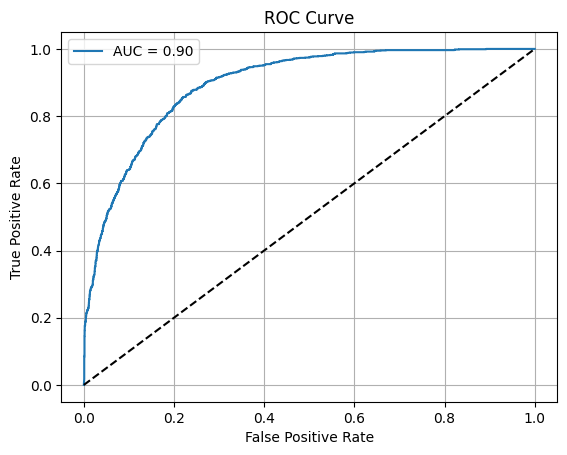

In [39]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

test_dataset = TensorDataset(torch.tensor(X_test.values, dtype=torch.float32),
                             torch.tensor(y_test.values, dtype=torch.float32))
test_loader = DataLoader(test_dataset, batch_size=256)

model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for xb, yb in test_loader:
        probs = model(xb).squeeze()
        all_preds.extend(probs.numpy())
        all_labels.extend(yb.numpy())

binary_preds = [1 if p >= 0.5 else 0 for p in all_preds]

cm = confusion_matrix(all_labels, binary_preds)
print("Confusion Matrix:\n", cm)

auc = roc_auc_score(all_labels, all_preds)
print(f"ROC AUC: {auc:.4f}")

import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(all_labels, all_preds)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [40]:
import numpy as np

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

fpr, tpr, thresholds = roc_curve(all_labels, all_preds)

youden_j = tpr - fpr
best_idx = np.argmax(youden_j)
best_threshold = thresholds[best_idx]

print(f"Best threshold by Youden's J: {best_threshold:.4f}")

adjusted_preds = (all_preds >= best_threshold).astype(int)

cm_adjusted = confusion_matrix(all_labels, adjusted_preds)
print("Confusion Matrix (Adjusted Threshold):\n", cm_adjusted)

from sklearn.metrics import f1_score
f1 = f1_score(all_labels, adjusted_preds)
print(f"F1 Score (Adjusted Threshold): {f1:.4f}")


Best threshold by Youden's J: 0.2390
Confusion Matrix (Adjusted Threshold):
 [[2587  812]
 [ 140  986]]
F1 Score (Adjusted Threshold): 0.6744


In [42]:
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(all_labels, binary_preds)
precision = precision_score(all_labels, binary_preds)
recall = recall_score(all_labels, binary_preds)
f1 = f1_score(all_labels, binary_preds)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


Accuracy:  0.8376
Precision: 0.7417
Recall:    0.5329
F1 Score:  0.6202


# Version 3: Trying Optuna

Just putting all the changes made after eda in one place

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv("/kaggle/input/adult-census-income/adult.csv")
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True) # not using imputer as this doesn't remove too many rows
drop_cols = ["fnlwgt","workclass","native.country", "education"]
df.drop(columns=drop_cols, inplace=True)
df.columns = df.columns.str.replace('.', '_', regex=False).str.lower().str.strip()
categorical_cols = df.select_dtypes(include="object").columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    

In [5]:
df.head()

,age,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
1,82,9,6,3,1,4,0,0,4356,18,0
3,54,4,0,6,4,4,0,0,3900,40,0
4,41,10,5,9,3,4,0,0,3900,40,0
5,34,9,0,7,4,4,0,0,3770,45,0
6,38,6,5,0,4,4,1,0,3770,40,0


In [7]:
from sklearn.preprocessing import StandardScaler

In [10]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop("income", axis=1).values
y = df["income"].values

In [18]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.15, stratify=y_trainval, random_state=42)


In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import optuna

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [21]:
def get_tensor_data(X, y):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)
    return TensorDataset(X_tensor, y_tensor)

train_dataset = get_tensor_data(X_train, y_train)
val_dataset = get_tensor_data(X_val, y_val)
test_dataset = get_tensor_data(X_test, y_test)

In [22]:
class ANN(nn.Module):
    def __init__(self, input_dim, hidden_size, dropout_rate, batch_norm):
        super(ANN, self).__init__()
        layers = [nn.Linear(input_dim, hidden_size)]
        if batch_norm:
            layers.append(nn.BatchNorm1d(hidden_size))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(dropout_rate))
        layers.append(nn.Linear(hidden_size, 1))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return torch.sigmoid(self.model(x))

In [23]:
from sklearn.metrics import f1_score
import optuna
from optuna.importance import get_param_importances

def objective_importance(trial):
    # All relevant hyperparameters
    hidden_size = trial.suggest_int('hidden_size', 16, 128)
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)
    batch_norm = trial.suggest_categorical('batch_norm', [True, False])
    learning_rate = trial.suggest_float('lr', 1e-5, 1e-2, log=True)
    weight_decay = trial.suggest_float('weight_decay', 1e-6, 1e-2, log=True)
    beta1 = trial.suggest_float('beta1', 0.85, 0.95)
    beta2 = trial.suggest_float('beta2', 0.95, 0.999)
    eps = trial.suggest_float('eps', 1e-10, 1e-6, log=True)

    model = ANN(X.shape[1], hidden_size, dropout_rate, batch_norm)
    optimizer = torch.optim.Adam(
        model.parameters(), 
        lr=learning_rate, 
        betas=(beta1, beta2), 
        eps=eps, 
        weight_decay=weight_decay
    )
    criterion = nn.BCELoss()

    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

    for epoch in range(5):  # keep it small, just for relative importance
        model.train()
        for xb, yb in train_loader:
            pred = model(xb)
            loss = criterion(pred, yb)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    model.eval()
    with torch.no_grad():
        preds, labels = [], []
        for xb, yb in val_loader:
            preds.append(model(xb))
            labels.append(yb)
        preds = torch.cat(preds).cpu().numpy()
        labels = torch.cat(labels).cpu().numpy()
        pred_labels = (preds > 0.5).astype(int)
        f1 = f1_score(labels, pred_labels)

    return f1


In [24]:
study_importance = optuna.create_study(direction="maximize")
study_importance.optimize(objective_importance, n_trials=20) 

importances = get_param_importances(study_importance)

print("\nHyperparameter Importance (based on F1 score):\n")
for param, imp in importances.items():
    print(f"{param:<15}: {imp:.4f}")


[I 2025-06-09 07:26:32,581] A new study created in memory with name: no-name-48ca7fb9-b72c-400d-8e7d-980c4e4fd7f6
[I 2025-06-09 07:26:42,319] Trial 0 finished with value: 0.5562659846547314 and parameters: {'hidden_size': 96, 'dropout_rate': 0.45683681841291524, 'batch_norm': False, 'lr': 0.00012673807335833085, 'weight_decay': 0.0005513486973304365, 'beta1': 0.9338010171591322, 'beta2': 0.9961203048101764, 'eps': 2.132925960310006e-08}. Best is trial 0 with value: 0.5562659846547314.
[I 2025-06-09 07:26:45,061] Trial 1 finished with value: 0.6577181208053692 and parameters: {'hidden_size': 41, 'dropout_rate': 0.3237643353081789, 'batch_norm': False, 'lr': 0.006339135034606798, 'weight_decay': 2.656422686582242e-05, 'beta1': 0.9177239316054688, 'beta2': 0.9680905579416168, 'eps': 1.1015256441931089e-10}. Best is trial 1 with value: 0.6577181208053692.
[I 2025-06-09 07:26:47,768] Trial 2 finished with value: 0.05279187817258883 and parameters: {'hidden_size': 104, 'dropout_rate': 0.0144


Hyperparameter Importance (based on F1 score):

lr             : 0.6183
dropout_rate   : 0.1819
weight_decay   : 0.0646
hidden_size    : 0.0576
beta1          : 0.0367
batch_norm     : 0.0250
beta2          : 0.0158
eps            : 0.0001


In [28]:
optuna.visualization.plot_param_importances(study_importance)

In [29]:
from optuna.trial import TrialState
from sklearn.metrics import f1_score
import optuna

def objective_optimized(trial):

    hidden_size = trial.suggest_int('hidden_size', 32, 256, step=32)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.6)
    learning_rate = trial.suggest_float('lr', 1e-5, 1e-2, log=True)
    weight_decay = trial.suggest_float('weight_decay', 1e-6, 1e-2, log=True)

    model = ANN(X.shape[1], hidden_size, dropout_rate, batch_norm=True)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    criterion = nn.BCELoss()

    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=256, shuffle=False)

    for epoch in range(10):
        model.train()
        for xb, yb in train_loader:
            pred = model(xb)
            loss = criterion(pred, yb)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        model.eval()
        with torch.no_grad():
            preds, labels = [], []
            for xb, yb in val_loader:
                preds.append(model(xb))
                labels.append(yb)
            preds = torch.cat(preds).cpu().numpy()
            labels = torch.cat(labels).cpu().numpy()
            pred_labels = (preds > 0.5).astype(int)
            f1 = f1_score(labels, pred_labels)

        # Report intermediate score to Optuna
        trial.report(f1, step=epoch)

        # If underperforms early, prune
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return f1


In [31]:
from optuna.pruners import SuccessiveHalvingPruner

study_final = optuna.create_study(
    direction="maximize",
    pruner=SuccessiveHalvingPruner()
)
study_final.optimize(objective_optimized, n_trials=50)

print("Best trial:")
print(study_final.best_trial.params)


[I 2025-06-09 07:37:41,695] A new study created in memory with name: no-name-702bc407-0868-4191-973e-943dd8337f46
[I 2025-06-09 07:37:48,454] Trial 0 finished with value: 0.6401425178147269 and parameters: {'hidden_size': 64, 'dropout_rate': 0.1699917514316225, 'lr': 0.002964060167346188, 'weight_decay': 0.0003850550860391026}. Best is trial 0 with value: 0.6401425178147269.
[I 2025-06-09 07:37:55,340] Trial 1 finished with value: 0.6304079110012362 and parameters: {'hidden_size': 192, 'dropout_rate': 0.2105640661930098, 'lr': 0.002891529457691057, 'weight_decay': 0.0001451874310840197}. Best is trial 0 with value: 0.6401425178147269.
[I 2025-06-09 07:37:56,727] Trial 2 pruned. 
[I 2025-06-09 07:37:58,134] Trial 3 pruned. 
[I 2025-06-09 07:37:59,528] Trial 4 pruned. 
[I 2025-06-09 07:38:07,890] Trial 5 finished with value: 0.6540664375715922 and parameters: {'hidden_size': 192, 'dropout_rate': 0.31832667025335315, 'lr': 0.0013808554169045478, 'weight_decay': 0.000365487477135175}. Best

Best trial:
{'hidden_size': 192, 'dropout_rate': 0.31832667025335315, 'lr': 0.0013808554169045478, 'weight_decay': 0.000365487477135175}


In [33]:
optuna.visualization.plot_optimization_history(study_final)


In [34]:
optuna.visualization.plot_param_importances(study_final)


In [36]:
print(f"Best Score: {study_final.best_value}")
print(f"Best Params: {study_final.best_params}")
print(f"Best Trial: {study_final.best_trial}")
print(f"Best Trial Params: {study_final.best_trial.params}")

Best Score: 0.6540664375715922
Best Params: {'hidden_size': 192, 'dropout_rate': 0.31832667025335315, 'lr': 0.0013808554169045478, 'weight_decay': 0.000365487477135175}
Best Trial: FrozenTrial(number=5, state=1, values=[0.6540664375715922], datetime_start=datetime.datetime(2025, 6, 9, 7, 37, 59, 529641), datetime_complete=datetime.datetime(2025, 6, 9, 7, 38, 7, 889969), params={'hidden_size': 192, 'dropout_rate': 0.31832667025335315, 'lr': 0.0013808554169045478, 'weight_decay': 0.000365487477135175}, user_attrs={}, system_attrs={'completed_rung_0': 0.620474406991261, 'completed_rung_1': 0.6707934721440629}, intermediate_values={0: 0.625609756097561, 1: 0.620474406991261, 2: 0.646643109540636, 3: 0.6306641837368093, 4: 0.6707934721440629, 5: 0.6463560334528077, 6: 0.6643874643874644, 7: 0.6697247706422018, 8: 0.6643913538111491, 9: 0.6540664375715922}, distributions={'hidden_size': IntDistribution(high=256, log=False, low=32, step=32), 'dropout_rate': FloatDistribution(high=0.6, log=Fal

In [37]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

best_params = study_final.best_params

# 1. Combine Train + Val
X_combined = np.vstack((X_train, X_val))
y_combined = np.concatenate((y_train, y_val))

X_combined_tensor = torch.tensor(X_combined, dtype=torch.float32)
y_combined_tensor = torch.tensor(y_combined, dtype=torch.float32).unsqueeze(1)
combined_dataset = TensorDataset(X_combined_tensor, y_combined_tensor)

# 2. Rebuild and Train Model
model = ANN(
    input_dim=X.shape[1],
    hidden_size=best_params['hidden_size'],
    dropout_rate=best_params['dropout_rate'],
    batch_norm=True
)

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=best_params['lr'],
    weight_decay=best_params['weight_decay']
)

criterion = nn.BCELoss()
train_loader = DataLoader(combined_dataset, batch_size=64, shuffle=True)

for epoch in range(15):
    model.train()
    for xb, yb in train_loader:
        preds = model(xb)
        loss = criterion(preds, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


In [38]:
def evaluate(model, dataset, name="Dataset"):
    loader = DataLoader(dataset, batch_size=64, shuffle=False)
    model.eval()
    with torch.no_grad():
        preds, labels = [], []
        for xb, yb in loader:
            preds.append(model(xb))
            labels.append(yb)
        preds = torch.cat(preds).cpu().numpy().flatten()
        labels = torch.cat(labels).cpu().numpy().flatten()

        pred_labels = (preds > 0.5).astype(int)

        f1 = f1_score(labels, pred_labels)
        acc = accuracy_score(labels, pred_labels)
        roc = roc_auc_score(labels, preds)
        cm = confusion_matrix(labels, pred_labels)
        report = classification_report(labels, pred_labels)

        print(f"\n Results on {name}")
        print("F1 Score:", f1)
        print("Accuracy:", acc)
        print("ROC AUC:", roc)
        print("Confusion Matrix:\n", cm)
        print("Classification Report:\n", report)

        fpr, tpr, _ = roc_curve(labels, preds)
        plt.figure()
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc:.2f})")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve: {name}")
        plt.legend(loc="lower right")
        plt.grid()
        plt.show()



 Results on Train + Val
F1 Score: 0.6388241620362073
Accuracy: 0.8428053204353083
ROC AUC: 0.9002989126211158
Confusion Matrix:
 [[18043  1212]
 [ 2818  3564]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     19255
         1.0       0.75      0.56      0.64      6382

    accuracy                           0.84     25637
   macro avg       0.81      0.75      0.77     25637
weighted avg       0.84      0.84      0.83     25637



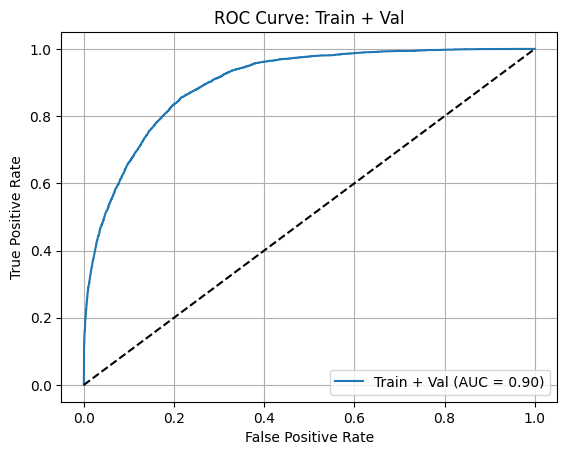


 Results on Test
F1 Score: 0.6544715447154472
Accuracy: 0.8497237569060774
ROC AUC: 0.9085929045059224
Confusion Matrix:
 [[3201  198]
 [ 482  644]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      3399
         1.0       0.76      0.57      0.65      1126

    accuracy                           0.85      4525
   macro avg       0.82      0.76      0.78      4525
weighted avg       0.84      0.85      0.84      4525



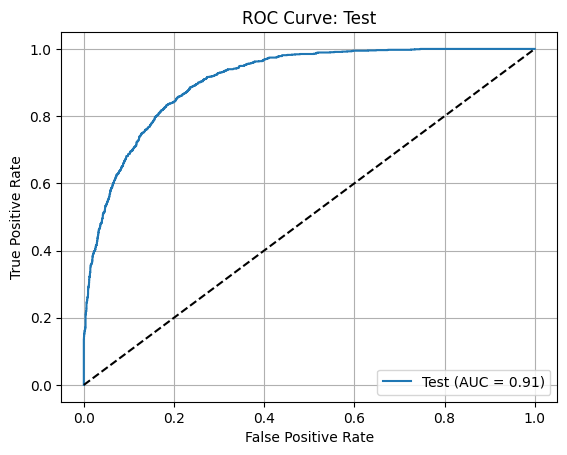

In [39]:
evaluate(model, combined_dataset, name="Train + Val")
evaluate(model, test_dataset, name="Test")


Using Manual Hyperparameter tuning: .62 f1 score
0.65 using Optuna